<a href="https://colab.research.google.com/github/JoshDTT/ejemplo_RNA_otono2023/blob/main/tarea_5_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Model
import math
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#problema 1
class RGBToGrayscale(Layer):
    def __init__(self, **kwargs):
        super(RGBToGrayscale, self).__init__(**kwargs)

    def build(self, input_shape):
        super(RGBToGrayscale, self).build(input_shape)

    def call(self, inputs):
        # Convertir RGB a escala de grises usando la fórmula: gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        grayscale = 0.2989 * inputs[:, :, :, 0] + 0.5870 * inputs[:, :, :, 1] + 0.1140 * inputs[:, :, :, 2]
        grayscale = tf.expand_dims(grayscale, axis=-1)
        return grayscale

    def compute_output_shape(self, input_shape):
        return input_shape[:-1] + (1,)

    def get_config(self):
        return super(RGBToGrayscale, self).get_config()

# implementación de las capa en un modelo secuencial:
model = tf.keras.Sequential()
model.add(RGBToGrayscale(input_shape=(224, 224, 3)))  # Se especifica el input shape

# La imagen RGB será convertida a escala de grises antes de pasar por el modelo

4/4 [==============================] - 0s 2ms/step


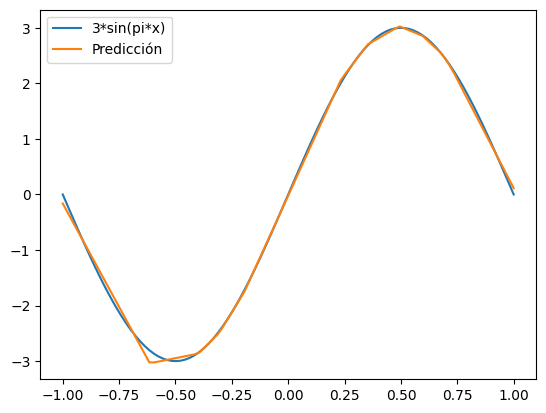

In [27]:
#Problema 2 inciso a


# Genera datos de entrada en el intervalo [-1, 1]
x = np.linspace(-1, 1, 100)
# Calcula los valores de salida para la función 3*sin(pi*x)
y_true = 3 * np.sin(np.pi * x)

# se define la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrena el modelo
model.fit(x, y_true, epochs=1000, verbose=0)

# Evalúa el modelo y muestra los resultados
y_pred = model.predict(x)
plt.plot(x, y_true, label='3*sin(pi*x)')
plt.plot(x, y_pred, label='Predicción')
plt.legend()
plt.show()


4/4 [==============================] - 0s 2ms/step


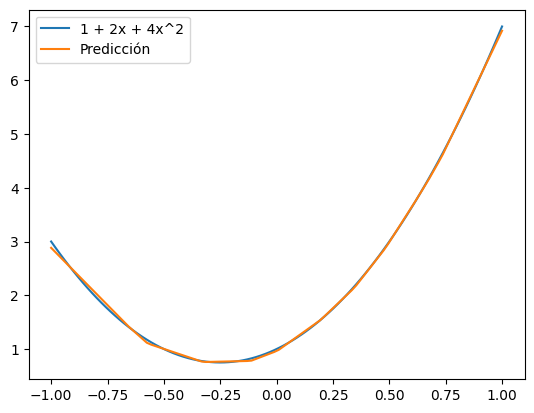

In [28]:
#problema 2 inciso b
# Genera datos de entrada en el intervalo [-1, 1]
x = np.linspace(-1, 1, 100)

# Calcula los valores de salida para la función 1 + 2x + 4x^2
y_true = 1 + 2 * x + 4 * x**2

# Define una red neuronal sencilla
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrena el modelo
model.fit(x, y_true, epochs=1000, verbose=0)

# Evalúa el modelo y muestra los resultados
y_pred = model.predict(x)
plt.plot(x, y_true, label='1 + 2x + 4x^2')
plt.plot(x, y_pred, label='Predicción')
plt.legend()
plt.show()

In [29]:
#problema 3
import tensorflow as tf

class PolynomialLayer(tf.keras.layers.Layer):
    def __init__(self, units=4, **kwargs):
        super(PolynomialLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        # Agregar parámetros entrenables para a0, a1, a2, a3
        self.coefficients = self.add_weight(name='coefficients',
                                           shape=(self.units,),
                                           initializer='random_normal',
                                           trainable=True)
        super(PolynomialLayer, self).build(input_shape)

    def call(self, x):
        # Calcular la función polinómica f(x) = a0 + a1*x + a2*x^2 + a3*x^3
        result = tf.reduce_sum([tf.pow(x, i) * self.coefficients[i] for i in range(self.units)], axis=0)
        return result

    def compute_output_shape(self, input_shape):
        return input_shape



4/4 [==============================] - 0s 2ms/step


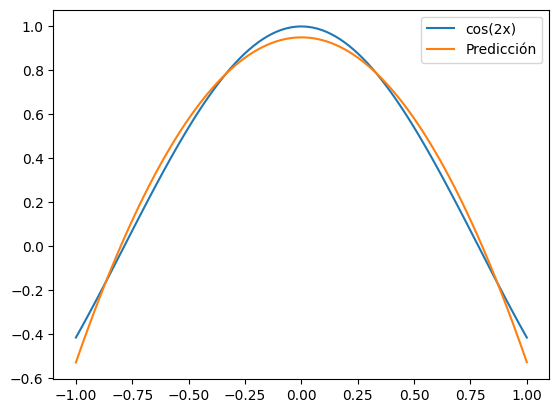

In [30]:


# Genera datos de entrada en el intervalo [-1, 1]
x = np.linspace(-1, 1, 100)

# Calcula los valores de salida para la función objetivo f(x) = cos(2x)
y_true = np.cos(2 * x)

# Define un modelo con la capa personalizada
model = tf.keras.Sequential([
    PolynomialLayer(units=4),  # Capa personalizada
])

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrena el modelo
model.fit(x, y_true, epochs=1000, verbose=0)

# Evalúa el modelo y muestra los resultados
y_pred = model.predict(x)
plt.plot(x, y_true, label='cos(2x)')
plt.plot(x, y_pred, label='Predicción')
plt.legend()
plt.show()


In [33]:
#problema 4
# Define la ecuación diferencial y las condiciones iniciales
def differential_eqn(x, y):
    return x * tf.gradients(y, x)[0] + y - x**2 * tf.cos(x)

# Genera datos de entrada en el intervalo [-5, 5]
x_data = np.linspace(-5, 5, 100).reshape(-1, 1)
y_true = np.zeros_like(x_data)

# Define una red neuronal para aproximar y(x)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Función de pérdida para la ecuación diferencial
def loss_fn():
    y = model(x_data)
    dy_dx = tf.GradientTape(y, x_data)[0]
    equation = x_data * dy_dx + y - x_data**2 * tf.cos(x_data)
    return tf.reduce_mean(equation**2)

# Optimizador
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Entrenamiento de la red neuronal para resolver la ecuación diferencial
for _ in range(1000):  # Puedes ajustar el número de épocas según sea necesario
    with tf.GradientTape() as tape:
        loss = loss_fn()
    gradients = tf.GradientTape(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Evalúa el modelo entrenado y muestra los resultados
y_pred = model(x_data)
plt.plot(x_data, y_pred, label='Aproximación de y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
#en esta parte no entendí porqué no me corrió el gradient tape pero intenté
#terminar esta parte del código como si me hubiese corrido para no dejarlo tan vacío

TypeError: ignored